# *Homework #1*

**Double Click here to edit this cell**
- Name : 김현동
- Student Id : 201901208
- Submission date : 2023/10/01

# Part 1 [5점]

### **Part 1의 학습 목표입니다.**

1. tensor의 기본 연산에 대해 익숙해지기.
2. Tensor의 broadcasting에 대해 알아보기.
3. Gradient descent를 이해하고 적용해보기


# 1-1

- **주어진 tensor x와 torch library function을 이용하여** 결과값을 다음과 같이 출력하시오.

In [1]:
import torch

x_batch_size,  x_seq_size, x_feature_size = 2, 3, 4

x = torch.arange(x_batch_size * x_seq_size * x_feature_size).view(x_batch_size, x_seq_size, x_feature_size)

print(x)
print("-----------"*4)
# Write your codes here
print(torch.cat([x, x], dim=1))
print("-----------"*4)

# Write your codes here
print(x.transpose(1,0))
print("-----------"*4)

# Write your codes here
print(x[:,:,1::2])
print("-----------"*4)

# Write your codes here
print(x.transpose(1,2))

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
--------------------------------------------
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23],
         [12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
--------------------------------------------
tensor([[[ 0,  1,  2,  3],
         [12, 13, 14, 15]],

        [[ 4,  5,  6,  7],
         [16, 17, 18, 19]],

        [[ 8,  9, 10, 11],
         [20, 21, 22, 23]]])
--------------------------------------------
tensor([[[ 1,  3],
         [ 5,  7],
         [ 9, 11]],

        [[13, 15],
         [17, 19],
         [21, 23]]])
--------------------------------------------
tensor([[[ 0,  4,  8],
         [ 1,  5,

**Your output must be** </br>

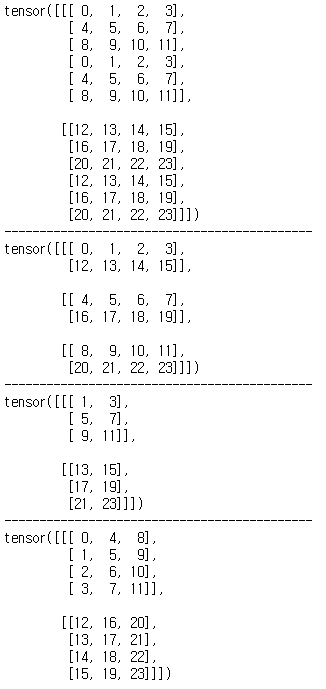

# 1-2

**1) Tensor의 broadcasting에 대해 설명하고, broadcast가 성립하기 위한 규칙들(broadcastable)에 대해 설명하시오.**
        

**2) 두 tensor의 shape이 (3, 1, 2)와 (1, 3, 1)이라면 두 tensor는 broadcastable한가
 이유와 함께 설명하시오.**

**3) 두 tensor의 shape이 (3, 2, 1)과 (3, 3, 3)이라면 broadcastable한가? 이유와 함께 설명하시오**

**Double Click here to write your answer**

1) 서로 다른 shape을 가진 텐서들을 연산할 때 사용하는 기능입니다. Tensor Broadcasting 기능을 사용하면 아래 규칙에 따라 차원 수(shape)를 일치 시킬 수 있고, 결국 연산이 가능하게 됩니다.
    * Broadcasting 규칙 : 
        1. 두 텐서의 차원 수가 다를 경우, 차원 수가 더 적은 텐서의 차원을 앞쪽에 1을 추가하여 차원 수를 일치시킵니다.
        2. 각 차원의 크기가 일치하거나 한 축이 1일경우, broadcasting이 가능합니다.
        3. 만약 어떤 차원에서 크기가 일치하지 않고 1도 아니라면, broadcasting 오류가 발생합니다.
           


2) broadcastable 합니다. shape을 일치시키기 위해서 한 축이 1이여야 한다는 2 규칙을 각 dim이 만족합니다. 따라서 broadcasting을 할 수 있습니다.
   

4) broadcastable 하지 않습니다. dim=1이 2 규칙에 만족하지 않아 broadcasting 할 수 없습니다.

# 1-3

**1. 주석 처리된 부분의 코드(2개)를 작성하시오.**
- torch.autograd.grad를 이용하여 gradient 계산
- 계산된 gradient 및 learning rate(lr)을 이용하여 x를 update

In [4]:
def func(x) :
    return (x-3)*(x-1)*(x-2)+5

x = torch.arange(1.0, 5.0, requires_grad = True).reshape(2, 2)
lr = 0.1

y = func(x)

gradients = torch.autograd.grad(y.sum(),x)

print("Gradients : \n", gradients[0])

with torch.no_grad() :
    x -= lr * gradients[0]


print("update tensor : \n", x)

Gradients : 
 tensor([[ 2., -1.],
        [ 2., 11.]])
update tensor : 
 tensor([[0.8000, 2.1000],
        [2.8000, 2.9000]], grad_fn=<AsStridedBackward0>)


**Your output must be**
</br>

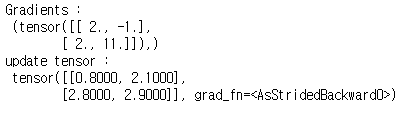

**2. update된 x의 값이 다음과 같이 출력된 이유를 작성하시오.**
- 경사하강법을 사용하여 x 값을 업데이트합니다. 경사하강법은 함수의 기울기를 계산하고, 기울기가 가르키는 방향의 반대로 x 값을 조금씩 변경하는 방법입니다. 따라서 업데이트된 x 값은 기존 x 값에서 학습률, 기울기의 곱을 뺀 값이 됩니다. 이렇게 x의 값을 함수의 최소값을 향해 점진적으로 이동시킬 수 있습니다.


**3. Gradient Descent는 왜 derivative의 반대 방향으로 가중치를 업데이트 하는지 작성하시오.**
- 경사하강법의 목적은 함수의 최소값을 찾는 것입니다. 미분 값은 함수가 가장 크게 증가하는 방향을 카르키므로, 그 반대방향으로 이동하면 함수의 값이 감소하게 됩니다. 따라서 미분 값의 반대 방향으로 가중치를 조금씩 변경하여 함수의 최소값을 찾아갑니다.


# Part 2 [5점]

### **Part 2의 학습 목표입니다.**

1. nltk library를 활용하여 NLP 전처리 기법 적용해보기.
2. TF, IDF, TF-IDF를 이해하고 구현해보기.
3. 전처리 기법과 TF-IDF의 사용 사례 알아보기.

In [6]:
# run this cell
import nltk
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\hyundong\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [7]:
# run this cell
#  nltk corpus의 webtext를 활용함.
from nltk.corpus import webtext

webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [8]:
# run this cell
# singles.txt의 첫 10개 ads 확인
for i, line in enumerate(webtext.raw('singles.txt').split('\n')):
    if i > 10:
        break
    print(str(i) + ':\t' + line)

0:	25 SEXY MALE, seeks attrac older single lady, for discreet encounters.
1:	35YO Security Guard, seeking lady in uniform for fun times.
2:	40 yo SINGLE DAD, sincere friendly DTE seeks r/ship with fem age open S/E
3:	44yo tall seeks working single mum or lady below 45 fship rship. Nat Open
4:	6.2 35 yr old OUTGOING M seeks fem 28-35 for o/door sports - w/e away
5:	A professional business male, late 40s, 6 feet tall, slim build, well groomed, great personality, home owner, interests include the arts travel and all things good, Ringwood area, is seeking a genuine female of similar age or older, in same area or surrounds, for a meaningful long term rship. Looking forward to hearing from you all.
6:	ABLE young man seeks, sexy older women. Phone for fun ready to play
7:	AFFECTIONATE LADY Sought by generous guy, 40s, mutual fulfillment
8:	ARE YOU ALONE or lost in a r/ship too, with no hope in sight? Maybe we could explore new beginnings together? Im 45 Slim/Med build, GSOH, high needs and lo

# 2-1
- singles.txt의 8번째 ads에 대한 sentence tokenize 출력해보기.
- **nltk의 sent_tokenize를 사용할 것.**

In [9]:
from nltk import sent_tokenize, word_tokenize
ads = webtext.raw('singles.txt').split('\n')
ad = ads[8]
sent_token = sent_tokenize(ad)
print(sent_token)

['ARE YOU ALONE or lost in a r/ship too, with no hope in sight?', 'Maybe we could explore new beginnings together?', 'Im 45 Slim/Med build, GSOH, high needs and looking for someone similar.', 'You WONT be disappointed.']


**Your output must be**

</br>

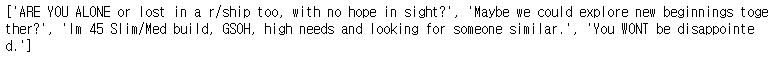

# 2-2
- sentence tokenize 된 문장에 대해 word tokenize 후 lowercase로 출력해보기
- **nltk의 word_tokenize를 사용할 것.**

In [12]:
for sent in sent_token :
    words = word_tokenize(sent)
    lower_words = [word.lower() for word in words]
    print(lower_words)

['are', 'you', 'alone', 'or', 'lost', 'in', 'a', 'r/ship', 'too', ',', 'with', 'no', 'hope', 'in', 'sight', '?']
['maybe', 'we', 'could', 'explore', 'new', 'beginnings', 'together', '?']
['im', '45', 'slim/med', 'build', ',', 'gsoh', ',', 'high', 'needs', 'and', 'looking', 'for', 'someone', 'similar', '.']
['you', 'wont', 'be', 'disappointed', '.']


**Your Output must be**

</br>

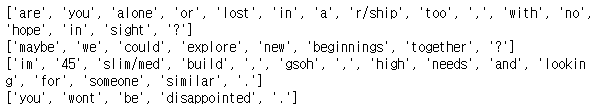

# 2-3
**1. sentence tokenize 된 문장에 대해 parsing 진행해보기**

In [13]:
from nltk import pos_tag
from tensorflow.keras.preprocessing.text import text_to_word_sequence

for sent in sent_token :
    tokenies = text_to_word_sequence(sent)
    # print(tokenies)
    tags_en = pos_tag(text_to_word_sequence(sent))

    print(tags_en)

[('are', 'VBP'), ('you', 'PRP'), ('alone', 'RB'), ('or', 'CC'), ('lost', 'VBN'), ('in', 'IN'), ('a', 'DT'), ('r', 'NN'), ('ship', 'NN'), ('too', 'RB'), ('with', 'IN'), ('no', 'DT'), ('hope', 'NN'), ('in', 'IN'), ('sight', 'NN')]
[('maybe', 'RB'), ('we', 'PRP'), ('could', 'MD'), ('explore', 'VB'), ('new', 'JJ'), ('beginnings', 'NNS'), ('together', 'RB')]
[('im', 'NN'), ('45', 'CD'), ('slim', 'NN'), ('med', 'VBD'), ('build', 'JJ'), ('gsoh', 'JJ'), ('high', 'JJ'), ('needs', 'NNS'), ('and', 'CC'), ('looking', 'VBG'), ('for', 'IN'), ('someone', 'NN'), ('similar', 'JJ')]
[('you', 'PRP'), ('wont', 'VBP'), ('be', 'VB'), ('disappointed', 'VBN')]


**Your Output must be**

</br>

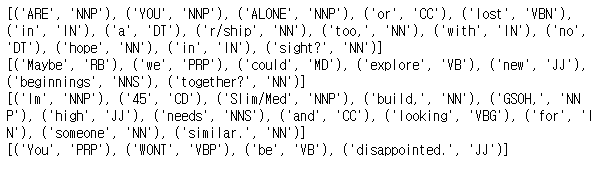

**2. parsing이 어떤 경우에 사용되는지 작성하시오.(사용 사례)**

'구문 분석(Syntax Analysis)'에 사용된다. 문장의 구성요소를 분해하고, 그들 사이의 위계 관계를 분석해 문장의 구조를 찾아내기 위함이다.  
보통은 각각의 어절 단위로 나눠 Parsing tree를 이용해 해당하는 tag를 부여해서 분류한다. 가령 ‘Time flies like an arrow.’라는 문장을 구문 분석하는 경우, flies를 명사 또는 동사로 분석하는지, like를 동사 또는 전치사로 분석하는지에 따라 분석 결과가 확연히 달라진다.
분석 결과에 영향을 주는만큼 중요한 단계로 여겨진다.

출처: KTenterprise https://enterprise.kt.com/bt/dxstory/746.do


# 2-4
**1. tf, idf, tf-idf 구현하기** </br>

In [18]:
import pandas as pd
from math import log

pd.set_option('display.max_columns', None)

vocab = sorted(list(set(x for word in sent_token for x in word.split())))

def tf(t, d):
    return d.count(t)

def idf(t, D):
    df = 0
    for doc in D:
        df += t in doc
    return log(len(D)/(df + 1))

def tf_idf(t, d, D):
    return tf(t, d) * idf(t, D)

**2. 주어진 vocab을 구현한 tf, idf, if_idf function을 사용하여 변수 이름이 tf_, idf_, tfidf_인 dataframe으로 구현하시오.** </br>

In [11]:
# run this cell
N = len(sent_token)

In [12]:
import pandas as pd
# 문서 집합 D 정의
D = sent_token

# 데이터프레임 초기화
tf_ = pd.DataFrame()

# 각 단어에 대해 tf, idf, tf-idf 계산
for t in vocab:
    tf_[t] = [tf(t, d) for d in D]

In [13]:
# run this cell
tf_

,45,ALONE,ARE,"GSOH,",Im,Maybe,Slim/Med,WONT,YOU,You,a,and,be,beginnings,"build,",could,disappointed.,explore,for,high,hope,in,looking,lost,needs,new,no,or,r/ship,sight?,similar.,someone,together?,"too,",we,with
0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0,1,1,1,1,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0,1,0,2,1,0,1,0,1,0,0,0,2,0,0,0,1,0,1,0,0,0,0,1,0,1,0
2,1,0,0,1,1,0,1,0,0,0,2,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Your Output must be**

</br>

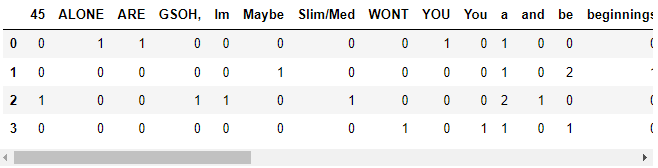

In [14]:
import math
# # Write your codes here

# 데이터프레임 초기화 (단어 개수 x 1)
idf_ = pd.DataFrame(index=vocab, columns=["IDF"])

# 각 단어에 대해 idf 계산 및 저장
for t in vocab:
    idf_["IDF"][t] = idf(t, D)

In [15]:
# run this cell
idf_

,IDF
45,0.693147
ALONE,0.693147
ARE,0.693147
"GSOH,",0.693147
Im,0.693147
Maybe,0.693147
Slim/Med,0.693147
WONT,0.693147
YOU,0.693147
You,0.693147


**Your Output must be**

</br>

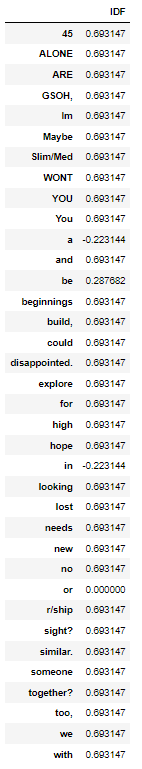

In [16]:
# Write your codes here
tfidf_ = pd.DataFrame()
for t in vocab:
    tfidf_[t] = [tf_idf(t, d, sent_token) for d in sent_token]

In [17]:
# run this cell
tfidf_

,45,ALONE,ARE,"GSOH,",Im,Maybe,Slim/Med,WONT,YOU,You,a,and,be,beginnings,"build,",could,disappointed.,explore,for,high,hope,in,looking,lost,needs,new,no,or,r/ship,sight?,similar.,someone,together?,"too,",we,with
0,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,-0.223144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,-0.446287,0.000000,0.693147,0.000000,0.000000,0.693147,0.0,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,-0.223144,0.000000,0.575364,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,-0.446287,0.000000,0.000000,0.000000,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000
2,0.693147,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,-0.446287,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,-0.223144,0.693147,0.000000,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,-0.223144,0.000000,0.287682,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,-0.223144,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Your Output must be**

</br>

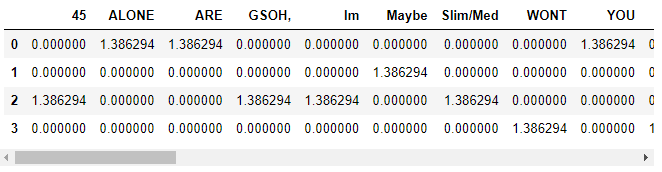

**3. tf-idf가 사용되는 사례(경우)를 서술하시오.**

‘TF-IDF’ 알고리즘은 특정 단어의 중요도를 측정하는 데 사용되며, 이는 단어가 출현한 횟수와 그 단어가 언급된 모든 문서의 총수에 비례합니다. 이 알고리즘은 검색 결과에서 키워드에 가장 잘 맞는 문서를 최상위에 배치하는 데 사용됩니다.

‘TF-IDF’ 가중치를 활용하여 검색 쿼리와 문서 간의 유사성을 측정하고, 가장 관련성이 높은 문서를 검색 결과의 상위에 배치합니다. 이를 통해 사용자는 원하는 정보를 더욱 빠르게 찾을 수 있습니다. 또한, 웹 페이지의 컨텐츠를 분석하여 검색 엔진에서 상위 랭크를 얻을 수 있는 키워드를 식별하고, 이를 검색 엔진 최적화에 활용할 수 있습니다.

요약하면, 'TF-IDF’는 검색 엔진과 정보 검색 시스템에서 텍스트 문서의 중요성을 측정하고 검색 결과를 개선하는 핵심적인 역할을 합니다. 이로 인해 사용자는 원하는 정보를 보다 정확하고 관련성이 높은 문서로 쉽게 찾을 수 있게 됩니다.
될 수 있다.

출처 : 블로터(https://www.bloter.net)